In [2]:
print("hello")

hello


In [3]:
class Value: 

    def __init__(self, data, _children=(), _op = '', label = ''): 
        self.data = data 
        self._prev = set(_children)
        self._op = _op 
        self.label = label 
        self.grad = 0.0
        
    def __repr__(self): 
        return f"Value(data={self.data})"

    def __add__(self, other): 
        return Value(self.data + other.data, (self, other), '+')


    def __mul__(self, other): 
        return Value(self.data * other.data, (self, other), '*')



In [4]:
a = Value(2.0); a.label = 'a'
b = Value(-3.0); b.label = 'b'
e = (a * b); e.label = 'e'
c = Value(10.0); c.label = 'c'
d = e + c; d.label = 'd'
f = Value(-2.0); f.label = 'f'
L = d * f; L.label = 'L'

In [5]:
# !brew install graphviz
# !pip3 install graphviz

In [6]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f  }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

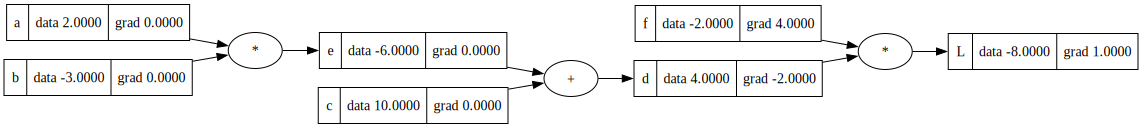

In [16]:
draw_dot(L)

# L.grad = 0.0
# d.grad = 0.0
# f.grad = 0.0

In [8]:
# L 
def func(): 

    h = 0.0001 

    a = Value(2.0); a.label = 'a'
    b = Value(-3.0); b.label = 'b'
    e = (a * b); e.label = 'e'
    c = Value(10.0); c.label = 'c'
    d = e + c; d.label = 'd'
    f = Value(-2.0); f.label = 'f'
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0); a.label = 'a'
    b = Value(-3.0); b.label = 'b'
    e = (a * b); e.label = 'e'
    c = Value(10.0); c.label = 'c'
    d = e + c; d.label = 'd'
    f = Value(-2.0); f.label = 'f'
    L = d * f; L.label = 'L'
    L.data += h 
    L2 = L.data 

    print((L2 - L1) / h)


func()

0.9999999999976694


In [9]:
L.grad = 1.0

In [11]:
# d
def func(): 

    h = 0.0001 

    a = Value(2.0); a.label = 'a'
    b = Value(-3.0); b.label = 'b'
    e = (a * b); e.label = 'e'
    c = Value(10.0); c.label = 'c'
    d = e + c; d.label = 'd'
    f = Value(-2.0); f.label = 'f'
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0); a.label = 'a'
    b = Value(-3.0); b.label = 'b'
    e = (a * b); e.label = 'e'
    c = Value(10.0); c.label = 'c'
    d = e + c; d.label = 'd'
    d.data += h
    f = Value(-2.0); f.label = 'f'
    L = d * f; L.label = 'L'
    L2 = L.data 

    print((L2 - L1) / h)


func()

-1.9999999999953388


In [12]:
d.grad = -2.0

In [14]:
# f
def func(): 

    h = 0.0001 

    a = Value(2.0); a.label = 'a'
    b = Value(-3.0); b.label = 'b'
    e = (a * b); e.label = 'e'
    c = Value(10.0); c.label = 'c'
    d = e + c; d.label = 'd'
    f = Value(-2.0); f.label = 'f'
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0); a.label = 'a'
    b = Value(-3.0); b.label = 'b'
    e = (a * b); e.label = 'e'
    c = Value(10.0); c.label = 'c'
    d = e + c; d.label = 'd'
    f = Value(-2.0); f.label = 'f'
    f.data += h
    L = d * f; L.label = 'L'
    L2 = L.data 

    print((L2 - L1) / h)


func()

3.9999999999995595


In [15]:
f.grad = 4.0